# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices.

We'll focus on bank stocks and see how they progressed throughout the 2008 financial crisis all the way to early 2016.

In [21]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We will get stock information for the following banks from the yahoo API
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [22]:
BAC = data.DataReader("BAC", 'yahoo', start ='2006-01-01', end='2016-01-01')
C = data.DataReader("C", 'yahoo', start ='2006-01-01', end='2016-01-01')
GS = data.DataReader("GS", 'yahoo', start ='2006-01-01', end='2016-01-01')
JPM = data.DataReader("JPM", 'yahoo', start ='2006-01-01', end='2016-01-01')
MS = data.DataReader("MS", 'yahoo', start ='2006-01-01', end='2016-01-01')
WFC = data.DataReader("WFC", 'yahoo', start ='2006-01-01', end='2016-01-01')

We need to put all the data in order, so we start by creating a list of the tickers

In [23]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

Concatenate all the info

In [24]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], keys=tickers, axis=1)

Set the column name levels

In [25]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [26]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   34.106041  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.743816  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.787266  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.736572  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.758297  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  36.364140  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  36.389069  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  36.488869  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  36.526283  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  36.912933  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.523809  
2006-01-04   31.799999  31.530001  10870000.0  20.285755  
2006-01-05   31.500000  31.495001  10158000.0  20.263241  
2006-01-06   31.580000  31.680000   8403800.0  20.382265  
2006-01-09   31.674999  31.674999   5619600.0  20.379047  

[5 rows x 36 columns]

The max close price for each bank's stock throughout the time period

In [27]:
bank_stocks.xs('Close', level= 'Stock Info', axis=1).max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

Returns for a bank's stock are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

Applying it to the dataframe

In [28]:
returns = bank_stocks.xs('Close', level= 'Stock Info', axis=1).pct_change()
returns.head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


A pairplot using of the returns dataframe, to see general trends and realitions between variables

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

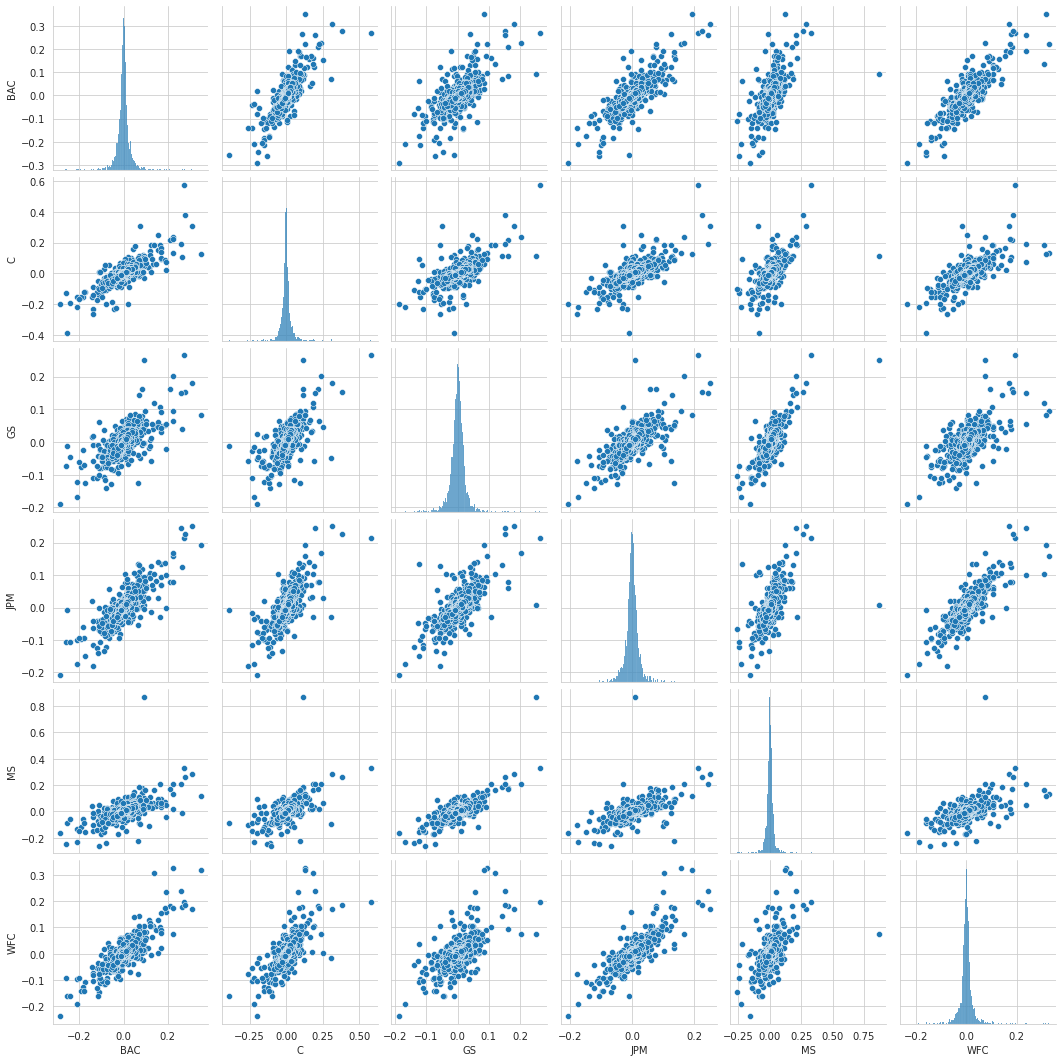

In [30]:
sns.pairplot(data= returns)

The dates for each bank's stock best and worst single day returns

In [31]:
returns[returns.min() == returns].unstack().dropna()

Bank Ticker  Date      
BAC          2009-01-20   -0.289694
C            2009-02-27   -0.390244
GS           2009-01-20   -0.189596
JPM          2009-01-20   -0.207274
MS           2008-10-09   -0.258929
WFC          2009-01-20   -0.238223
dtype: float64

In [32]:
returns[returns.max() == returns].unstack().dropna()

Bank Ticker  Date      
BAC          2009-04-09    0.352691
C            2008-11-24    0.578249
GS           2008-11-24    0.264678
JPM          2009-01-21    0.250967
MS           2008-10-13    0.869835
WFC          2008-07-16    0.327645
dtype: float64

Most falls are within the crash date. Looking at the standard deviation of the returns

In [33]:
returns.std()

Bank Ticker
BAC    0.036647
C      0.038672
GS     0.025390
JPM    0.027667
MS     0.037819
WFC    0.030238
dtype: float64

Citigroups is the riskiest, but not by much. We create a year column to see the std in 2015

In [34]:
returns['year'] = returns.index.year

In [35]:
returns[returns['year'] == 2015].std()

Bank Ticker
BAC     0.016163
C       0.015289
GS      0.014046
JPM     0.014017
MS      0.016249
WFC     0.012591
year    0.000000
dtype: float64

2015 returns for Morgan Stanley

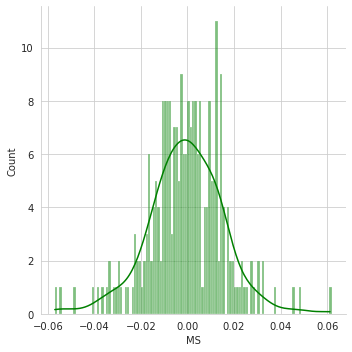

In [36]:
sns.displot(data=returns[returns['year'] == 2015]['MS'],kde = True, color='green', binwidth = .001)

2008 returns for CitiGroup

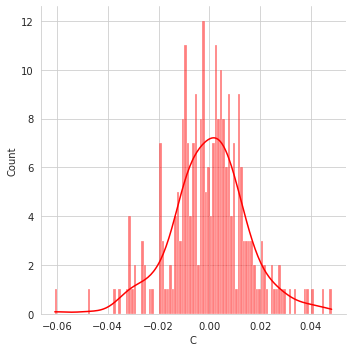

In [37]:
sns.displot(data=returns[returns['year'] == 2015]['C'],kde = True, color='red', binwidth = .001)

In [47]:
sns.set_style('whitegrid')
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

cf.go_offline()


Line plot showing Close price for each bank for the entire index of time

In [39]:
close_price = bank_stocks.xs('Close', level= 'Stock Info', axis=1)

In [48]:
close_price.iplot()

Let's analyze the moving 30 day average for these stocks in the year 2008

In [49]:
close_price['year'] = close_price.index.year

In [50]:
BAC_close = close_price[close_price['year'] == 2008]['BAC']

In [51]:
BAC_close_avg = BAC_close.rolling(window=30).mean()

In [52]:
BAC_2008 = pd.concat([BAC_close, BAC_close_avg], keys=['BAC close', 'BAC close 30d average'], axis=1)

In [53]:
BAC_2008.iplot(kind='line')

Heatmap of the correlation between the stocks close price

In [54]:
corr_close = bank_stocks.xs('Close', level= 'Stock Info', axis=1).corr()

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

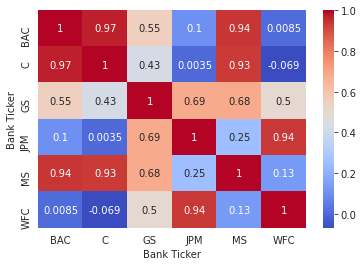

In [55]:
sns.heatmap(corr_close, annot=True, cmap='coolwarm')

Clustering the correlations together:

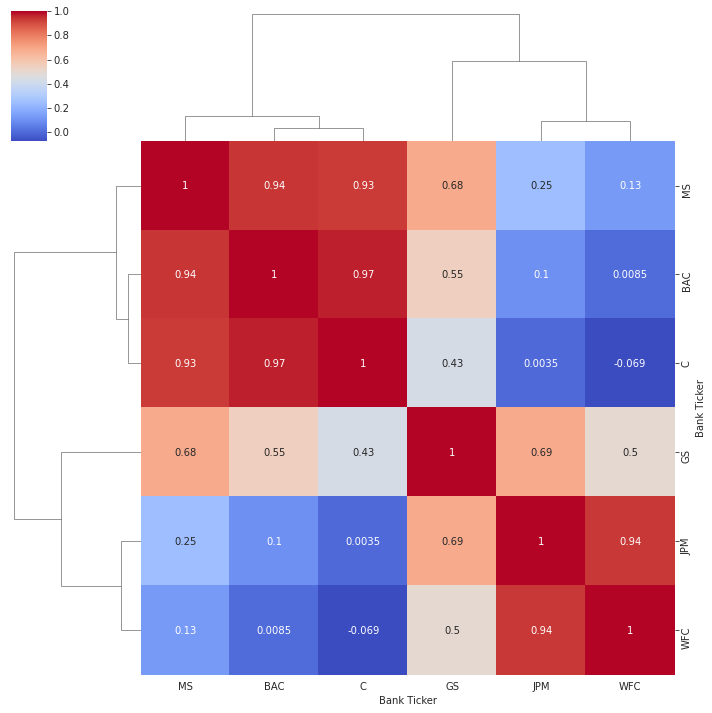

In [56]:
sns.clustermap(corr_close, annot=True, cmap='coolwarm')

#### In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. Some of it's functionality may be broken in the future.

Candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016

In [57]:
bank_stocks['year'] = bank_stocks.index.year

In [58]:
BAC_2015 = bank_stocks[bank_stocks['year'] == 2015]['BAC']

In [60]:
go.Figure(data=[go.Candlestick(x=BAC_2015.index,
                open=BAC_2015['Open'],
                high=BAC_2015['High'],
                low=BAC_2015['Low'],
                close=BAC_2015['Close'])])

Simple Moving Averages plot of Morgan Stanley for the year 2015

In [61]:
MS_2015 = bank_stocks[bank_stocks['year'] == 2015]['MS']

In [62]:
MS_2015['Close'].ta_plot(study='sma',periods=[30])

Bollinger Band Plot for Bank of America for the year 2015

In [63]:
MS_2015['Close'].ta_plot(study='boll')